# Project: Investigate a No-Show Medical Appointments in Brazil - May 2016

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This project analyses dataset which is filled with information from 100,000 medical appointments in Brazil. The aim of this project is to analyse factors/variables that determine whether a patient showed up for his/her appointment and to predict how these factors influence a patient's show/no-show.

### Dataset Description 
This dataset consists of 100k medical appointments spooled in Brazil in May, 2016. It has 14 variables which contain characteristics that give information about the individual patients.

There are 14 variables (columns) contained in the dataset as follows:

Patient Id - Id of the patient

AppointmentID - Id number of the appointment

Gender - Male or Female 

Scheduled Day - Day the patienta set up their appointment.

Appointment Day - Date of Appointment

Age - Patient's age

Neighbourhood -  Location of the hospital

Scholarship - indicates whether or not the patient is enrolled in Brasilian welfare program "Bolsa Família" (More information can be found here: <a href="https://www.google.com/url?q=https://en.wikipedia.org/wiki/Bolsa_Fam%25C3%25ADlia&sa=D&source=editors&ust=1659615590301987&usg=AOvVaw2TqZH58rcZvHikI6Ogsxqj" target="_blank">Read More</a>)

Hypertension - Health condition if present (1 or 0)

Diabetes     - Health condition if present (1 or 0)

Alcoholism   - Health condition if present (1 or 0)

Handcap      - Health condition if present

SMS_received - Message sent to patient (1 or 0)

No-show   - if the patient showed up to their appointment or not. **The column indicates no or yes. It means 'No' if the patient showed up to their appointment, and ‘Yes’ if they did not show up**.


### Question(s) for Analysis

1. What is the proportion of those that showed up for the appointment and those who were absent? 

2. Based on the patient's id; how many patients were new vs returning (if there are duplicates) and how does this influence the No-Show variable?

3. What is the influence of gender on no-show appointments?

5. How many patients were in each age group and based on the age group, what is the no-show distribution?

6. What is the proportion of the gender in each age group?

7. What is the relationship between gender, age_group and how does it influence attendance?

8. What is the relationship between gender, age_group and how does it influence attendance?

9. Does the scholarship (welfare) program influence a patient to show up for appointments?

10. What is the relationship between scholarship, returning_patient, gender, age_group and how does it influence attendance?

11. Do health challenges (alcoholism, diabetes, hypertension) influence a patient to show up for appointments?

12. Does text reminder influence a patient to show up for appointments?

13. Do health challenges (alcoholism, diabetes, hypertension) influence a patient to show up for appointments?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Assessing Data by doing the following:
- load the dataset
- check for size of dataset
- view datatypes of the columns and also check for missing values
- Get information across the datasets in relating to the values such as min, max, mean, median etc

In [2]:
#Loading the data
df = pd.read_csv('/home/workspace/Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [3]:
#View size of dataset
df.shape

(110527, 14)

In [4]:
#using info() function to get a concise summary of the dataset;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Get information across the datasets in relating to the values such as min, max, mean, median etc
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
#Check for duplicates
sum(df.duplicated())

0

In [7]:
#Check for unique not null values
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
#Read the first few rows to see what the dataset contains
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#Checking the unique value of health conditions/physical challenges/social factors, gender, sms_received, no_show
#1. hypertension
print(df['Hipertension'].unique())

[1 0]


In [10]:
#2. diabetes
print(df['Diabetes'].unique())

[0 1]


In [11]:
#3. alcoholism
print(df['Alcoholism'].unique())

[0 1]


In [12]:
#4. handicap
print(df['Handcap'].unique())

[0 1 2 3 4]


In [13]:
#6. gender
print(df['Gender'].unique())

['F' 'M']


In [14]:
#7. sms_received
print(df['SMS_received'].unique())

[0 1]


In [15]:
#8. no_show
print(df['No-show'].unique())

['No' 'Yes']


From the output, I can deduce the following:
- There are 110527 rows and 14 columns in this dataset.
- there are no missing values
- the columns are not properly labelled for easy read and use
- scheduled day and appointment day columns are in string datatype format (object)
- the patient id column is in float datatype format
- based on important note stipulated in the Udacity Google repository overview for no-show column; it would be best to change the name of the column to something appropriate to avoid confusion or having to state the note in every section. 
- As seen from the output of the age column, an age of -1 is impossible. The particular row will not be needed hence dropping it as it would affect other variables considering the fact that it has other values recorded.
- About 25% of the patients are 18years and below whilst the median age is around 37years. About 75% are younger than or equal to 55years. Maximum age is 115years
- There are no duplicate values
- There are no null values
- As seen from the output gotten from the unique() function, we don't have much information in the documentation as to what the handicap values (0-4) depict; rather it was stated as True or False. I also checked the source on Kaggle (discussion channel), the dataset owner couldn't ascertain exactly what it signifies.


### Data Cleaning
#### The following steps will be carried out:
 - renaming the columns appropriately and adding space where appropriate. Also all column names will be changed to lowercase
    - no-show column label will be changed to absent 
 - changing the datatype of the column labels with 'day' words to datetime
 - Changing the datatype of the patient id column to the right datatype integer considering the type of variable it is
 - deletion of the age row with -1 value
 - removal of the appointment column as this wouldn't be needed
 - deletion of rows with 2,3,4 values in the handicap column

In [16]:
#Cleaning Column labels

#1. Correcting the hipertension label
df.rename(columns = {'AppointmentID':'Appointment ID', 'Hipertension':'Hypertension', 'PatientId':'Patient Id', 'ScheduledDay':'Scheduled Day', 'AppointmentDay':'Appointment Day', 'Handcap':'Handicap', 'No-show':'Absent'}, inplace=True)

#2. Replacing space with underscore and in lowercase
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

#3. Confirming the updates
df.columns

Index(['patient_id', 'appointment_id', 'gender', 'scheduled_day',
       'appointment_day', 'age', 'neighbourhood', 'scholarship',
       'hypertension', 'diabetes', 'alcoholism', 'handicap', 'sms_received',
       'absent'],
      dtype='object')

In [17]:
#Converting the dates columns to datetime datatype
day_columns = ['scheduled_day', 'appointment_day']
for dc in day_columns:
    df[dc] = pd.to_datetime(df[dc])

#Converting patient_id column from float to int
df['patient_id'] = df['patient_id'].astype(int)

#Confirm update
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null int64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null datetime64[ns]
appointment_day    110527 non-null datetime64[ns]
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
absent             110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


In [18]:
#To view the row containing the age value 0f -1
df.query('age == -1')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absent
99832,465943158731293,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [19]:
#delete row
df.drop(df[df.age == -1].index, inplace=True)

In [20]:
#Confirm that the row has been removed
df.query('age == -1')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absent


In [21]:
#drop the appointment_id column
df.drop(['appointment_id'], axis=1, inplace=True)

In [22]:
#
df.head(1)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absent
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

### What is the proportion of those that showed up for the appointment and those who were absent? 

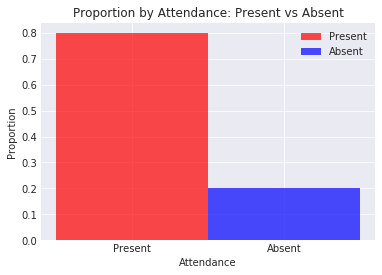

In [23]:
#Check the attendance
df['absent'].value_counts()
present_df = df['absent'].value_counts()['No']
absent_df = df['absent'].value_counts()['Yes']
total_attendance_df = df.absent.size

proportion_present = present_df/total_attendance_df
proportion_absent = absent_df/total_attendance_df

#Set the x coordinate location for each rating group and and width of each bar.
ind = np.arange(proportion_present)  # the x locations for the groups
width = 4       # the width of the bars

# plot bars
present_bars = plt.bar(ind, proportion_present, width, color='r', alpha=.7, label='Present')
absent_bars = plt.bar(ind + width, proportion_absent, width, color='b', alpha=.7, label='Absent')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Attendance')
plt.title('Proportion by Attendance: Present vs Absent')
locations = [0,4]  # xtick locations
labels = ['Present', 'Absent']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

From the above chart; it can be deduced that 80% of the patients showed up for their medical appointments, while 20% were absent.

### Based on the patient's id; how many patients were new vs returning (if there are duplicates) and how does this influence the No-Show variable?

In [24]:
#Check if there are duplicates in the column
sum(df['patient_id'].duplicated())

48228

Based on the output, I would create column that indicates if a patient is new or not. Based on my research on Stackoverflow and implementation (<a href="https://stackoverflow.com/questions/70441469/fill-new-column-with-true-false-for-each-unique-account-with-subset-of-another-c" target="_blank">Creating a column based on duplicate values</a>

In [25]:
#Create a column that indicates if a patient is new or returning
df["patient_id_duplicate"] = df.duplicated(["patient_id"], keep=False)
df["returning_patient"] = df.groupby(["patient_id"])["patient_id_duplicate"].transform("all")
df = df.drop("patient_id_duplicate", axis=1)
df.head(10)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absent,returning_patient
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,True
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,True
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False
5,95985133231274,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,True
6,733688164476661,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,False
7,3449833394123,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,True
8,56394729949972,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No,False
9,78124564369297,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No,False


In [26]:
#Testing the above with index 1 - which shows true in the returning_patient column
df.query('patient_id == 558997776694438')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absent,returning_patient
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True
2500,558997776694438,M,2016-04-29 15:20:47,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True


In [27]:
#Testing the above with index 1 - which shows false in the returning_patient column to indicate a first timer
df.query('patient_id == 99948393975')

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absent,returning_patient
15,99948393975,F,2016-04-26 08:47:27,2016-04-29,15,NOVA PALESTINA,0,0,0,0,0,1,No,False


In [28]:
#Showing the value count of returning_patient based on the values
df.returning_patient.value_counts()

True     72607
False    37919
Name: returning_patient, dtype: int64

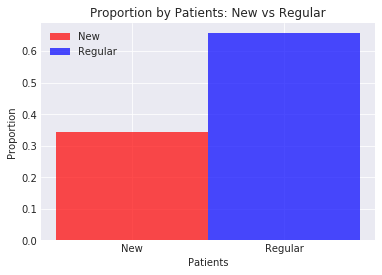

In [29]:
#Check how many were new or returning
new_df = df['returning_patient'].value_counts()[False]
regular_df = df['returning_patient'].value_counts()[True]
total_patients_df = df.patient_id.size

proportion_new = new_df/total_patients_df
proportion_regular = regular_df/total_patients_df

#Set the x coordinate location for each rating group and and width of each bar.
ind = np.arange(proportion_present)  # the x locations for the groups
width = 4       # the width of the bars

# plot bars
new_bars = plt.bar(ind, proportion_new, width, color='r', alpha=.7, label='New')
regular_bars = plt.bar(ind + width, proportion_regular, width, color='b', alpha=.7, label='Regular')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Patients')
plt.title('Proportion by Patients: New vs Regular')
locations = [0,4]  # xtick locations
labels = ['New', 'Regular']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

#### The chart shows that more that 66% are regular patients while about 34% are new patients. So, the next step would be to see the attendance rate between this group.

In [30]:
#Drawing conclusions between no_show value counts and returning_patient value counts using groupby
df.groupby(['absent', 'returning_patient']).size()

absent  returning_patient
No      False                30801
        True                 57406
Yes     False                 7118
        True                 15201
dtype: int64

To be able to plot this output generated by the groupby function in a graph; I did a research on how to do a plot asides the df.groupby function(.plot) and came across this code on stackoverflow: <a href="https://stackoverflow.com/questions/45299305/how-to-plot-pandas-groupby-values-in-a-graph" id=1>1</a>. I decided to use the crosstab function and read more on it as it really helps in data analysis: <a href="https://www.geeksforgeeks.org/using-pandas-crosstab-to-create-a-bar-plot/" target="_blank" id=2>2</a>

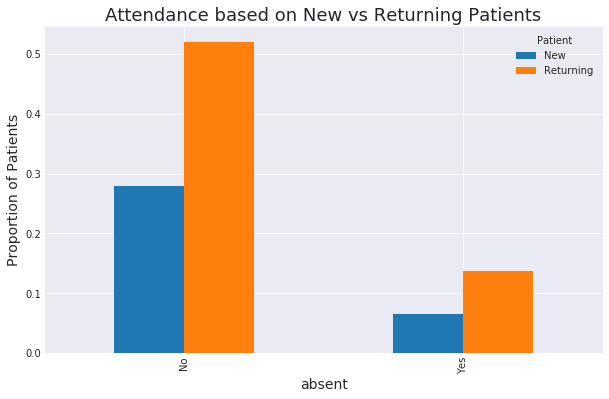

In [31]:
# Plot a bar graph
# Using crosstab (It is a function that helps to view the relationship between two or more features)

pd.crosstab(df['absent'],df['returning_patient'], normalize=True).plot.bar(figsize=(10, 6))

# Set titles and axes
plt.title('Attendance based on New vs Returning Patients', fontsize = 18)
plt.xlabel('absent', fontsize=14)
plt.ylabel('Proportion of Patients', fontsize=14)
plt.legend(title='Patient', labels=['New', 'Returning']);

As can be inferred from the output above, about 52% of the total patients that showed up for their appointment were regular (returning) patients while 28% were first timers. 

About 6% of new patients and 14% of returning patients didn't show up

### What is the influence of gender on no-show appointments?

In [32]:
#Proportion of male patients vs female patients
df.gender.value_counts()


F    71839
M    38687
Name: gender, dtype: int64

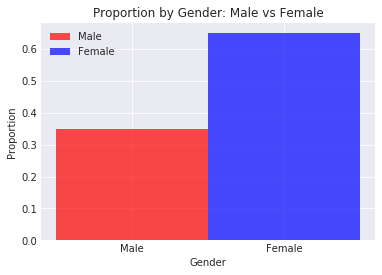

In [33]:
#Check how many were new or returning
male_df = df['gender'].value_counts()['M']
female_df = df['gender'].value_counts()['F']
total_gender_df = df.gender.size

proportion_male = male_df/total_gender_df
proportion_female = female_df/total_gender_df

#Set the x coordinate location for each rating group and and width of each bar.
ind = np.arange(proportion_present)  # the x locations for the groups
width = 4       # the width of the bars

# plot bars
male_bars = plt.bar(ind, proportion_male, width, color='r', alpha=.7, label='Male')
female_bars = plt.bar(ind + width, proportion_female, width, color='b', alpha=.7, label='Female')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Gender')
plt.title('Proportion by Gender: Male vs Female')
locations = [0,4]  # xtick locations
labels = ['Male', 'Female']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

About 35% of the patients are male and about 65% of the patients are female as deduced from the chart.

In [34]:
#View size of gender
df.groupby(['absent', 'gender']).size()

absent  gender
No      F         57245
        M         30962
Yes     F         14594
        M          7725
dtype: int64

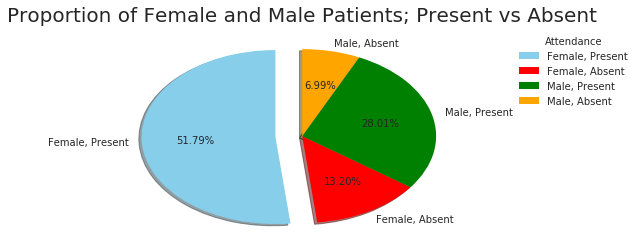

In [35]:
#Checking the proportion of gender
#Creating labels
labels = ['Female, Present', 'Female, Absent', 'Male, Present', 'Male, Absent']
bin_edges = [57245, 14594, 30962, 7725 ]
myexplode = [0.2, 0, 0, 0]
colors = ['skyblue', 'red', 'green', 'orange']

#Configure axis
fig, ax = plt.subplots()
ax.pie(bin_edges, labels=labels, colors=colors, explode=myexplode, autopct='%1.2f%%', shadow=True, startangle=90)

#Title of the chart
plt.title('Proportion of Female and Male Patients; Present vs Absent', fontsize= 20)

#Configure legend
plt.legend(title='Attendance', loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

#plot piechart
plt.show()

The chart shows that about 51.79% female patients showed up for their appointments while 13.20% were absent. 28.01% of the male patients were present for their appointments while 6.99% male patients were absent

### How many patients were in each age group and based on the age group, what is the no-show distribution?

#Firstly, it is important to have an age range classification to have better analysis across the age groups.
#I would be making use of the pandas' cut function to create the age groups.

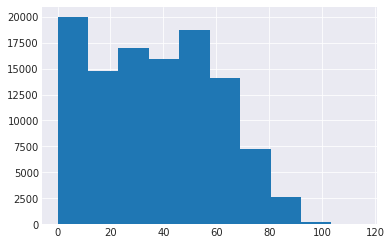

In [36]:
#A quick plot to show the age distribution
df.age.hist();

The histogram shows that the ages of 10 and below, ages between around 45 to 55years are predominant.

In [37]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [0, 10, 15, 20, 40, 60, 80, 115]

# Labels for the ages
age_classification = [ 'Child', 'Teenager', 'Youth', 'Young Adult', 'Middle Age Adult', 'Senior Adult', 'Aged']

# Creates age group column
df['age_group'] = pd.cut(df['age'], bin_edges, labels=age_classification, include_lowest=True)

# Checks for successful creation of this column
df.head(5)

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,absent,returning_patient,age_group
0,29872499824296,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,True,Senior Adult
1,558997776694438,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,True,Middle Age Adult
2,4262962299951,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,True,Senior Adult
3,867951213174,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,True,Child
4,8841186448183,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,False,Middle Age Adult


In [38]:
#Checking the total number of patients via each age group.
df.age_group.value_counts()

Middle Age Adult    30081
Young Adult         28835
Child               18749
Senior Adult        16910
Youth                7380
Teenager             5719
Aged                 2852
Name: age_group, dtype: int64

In [39]:
#Checking the number of patients via each age group that showed up for appointment or not.
df.groupby(['absent', 'age_group']).size()

absent  age_group       
No      Child               14961
        Teenager             4259
        Youth                5532
        Young Adult         22209
        Middle Age Adult    24490
        Senior Adult        14373
        Aged                 2383
Yes     Child                3788
        Teenager             1460
        Youth                1848
        Young Adult          6626
        Middle Age Adult     5591
        Senior Adult         2537
        Aged                  469
dtype: int64

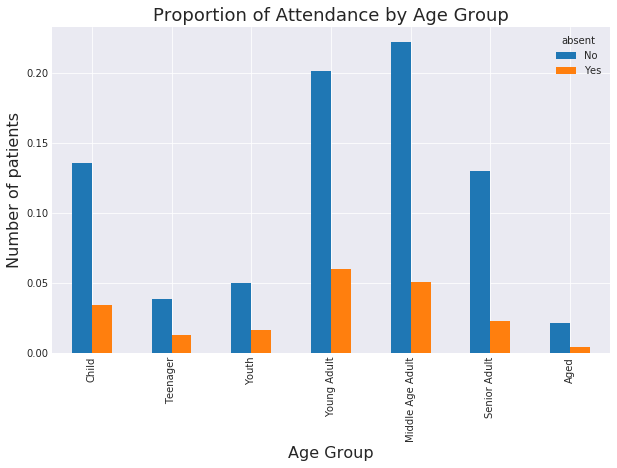

In [40]:
# Plot a bar graph to show the variation between the attendance values across the age groups
pd.crosstab(df['age_group'],df['absent'], normalize=True).plot.bar(figsize=(10, 6));

plt.title('Proportion of Attendance by Age Group', fontsize=18)
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Number of patients', fontsize=16)
plt.xticks(rotation=90)
plt.show()



As seen from on the chart; the predominant groups that showed up for their appointments are Middle Age Adults (41-60 years), Young Adults (21-40years), Children (10years below) respectively and the ratio of attendance is quite significant compared to the other age groups.

### What is the proportion of the gender in each age group?

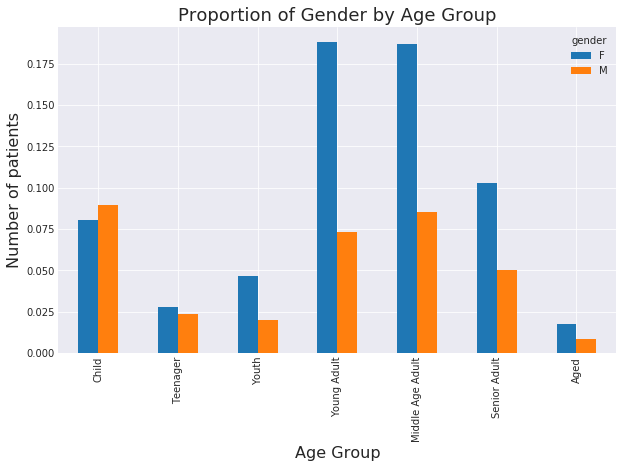

In [41]:
#Plotting Age group vs gender
pd.crosstab(df['age_group'],df['gender'], normalize=True).plot.bar(figsize=(10, 6))

plt.title('Proportion of Gender by Age Group', fontsize=18)
plt.xlabel('Age Group', fontsize=16)
plt.ylabel('Number of patients', fontsize=16)
plt.xticks(rotation=90)
plt.show();

As seen from the above, all age groups except the child age group contain more female patients than male patients. It is quite significant in the young adult, middle age adult and senior adult groups.

### What is the relationship between gender, age_group and how does it influence attendance?

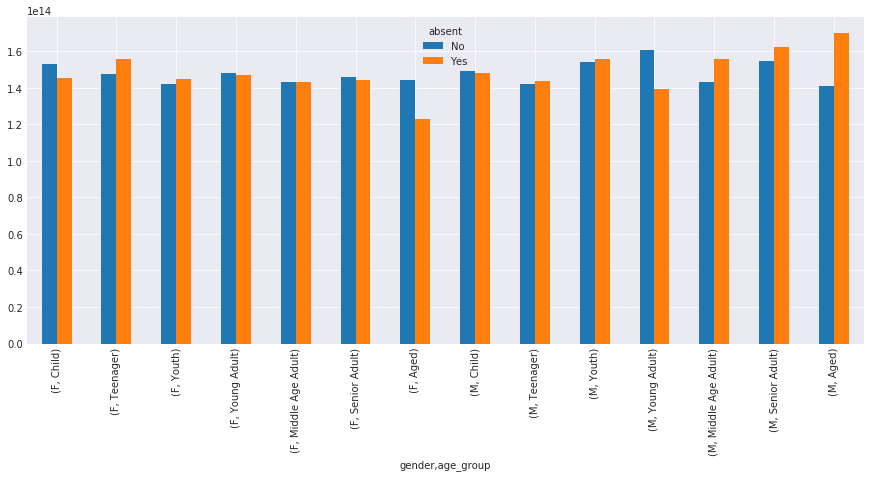

In [42]:
#Plot the gender, age_group, absent variables to see the influence on attendance
df.pivot_table(index=['gender', 'age_group'], columns=['absent'], values='patient_id', aggfunc='mean', fill_value=0).plot(kind='bar', figsize=(15,6));

As seen from the relationship between the three variables - gender, age group and absence, there are almost equal proportions across the groups for attendance from both genders although, the male aged age group shows records more absence in comparison with the opposite gender in the same age group. Same applies male young adult group too.

### Does the scholarship (welfare) program influence a patient to show up for appointments?

In [43]:
#View the variations in size between those that received scholarship or not.
df.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [44]:
#Checking the ratio of patients on scholarship that showed up for appointment or not.
df.groupby(['absent', 'scholarship']).size()

absent  scholarship
No      0              79924
        1               8283
Yes     0              19741
        1               2578
dtype: int64

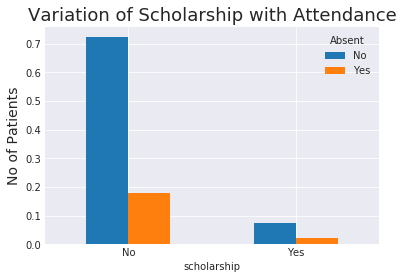

In [45]:
# Plot a bar graph based on groupby data
# Using crosstab (It is a function that helps to view the relationship between two or more features)

pd.crosstab(df['scholarship'],df['absent'], normalize=True).plot.bar()

x=[0,1]
xlabels=['No', 'Yes']

# Set titles and axes
plt.title('Variation of Scholarship with Attendance', fontsize = 18)
plt.xticks(x, xlabels, rotation='horizontal')
plt.ylabel('No of Patients', fontsize=14)
plt.legend(title='Absent', labels=["No", "Yes"]);

The graph above shows that about 70% showed up for their medical appointments and are not on welfare (scholarship) in comparison to those that were on scholarship (about 8%) and didn't show up.

### What is the relationship between scholarship, returning_patient, gender, age_group and how does it influence attendance?

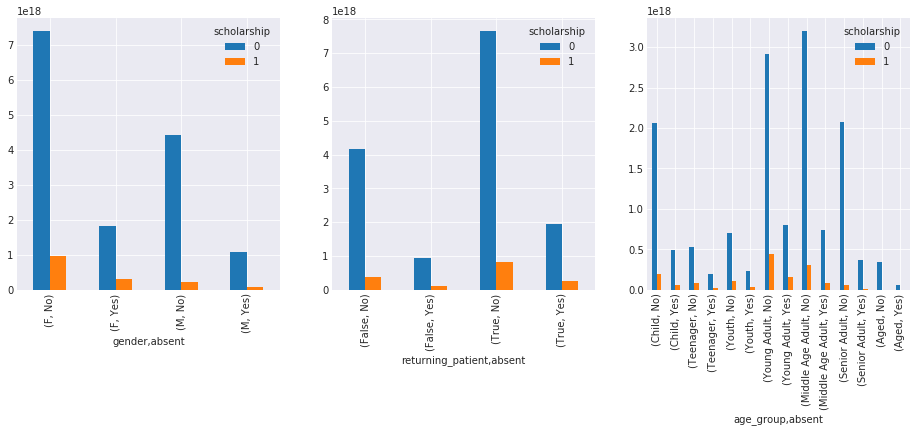

In [46]:
# Plotting 
category_list = ['gender', 'returning_patient', 'age_group']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(category_list):
    ax = fig.add_subplot(2, 3, i+1)
    df.pivot_table(index=[var, 'absent'], columns=['scholarship'], values='patient_id', aggfunc='sum', fill_value=0).plot(ax=ax, kind='bar');

As seen from the charts above; 
 
*Gender*
 - there are more females on scholarship than males.
 - As scholarship decreases, attendance also decreases.
 - Also, there is a percentage of those who are not on scholarship also having high attendance rate than those on scholarship. Scholarship doesn't seem to influence patient's attendance to appointment
 
*Returning/New Patients*
 - there are more regular patients on scholarship than new patients
 - As scholarship decreases, attendance also decreases.
 - Also, there is a percentage of those who are not on scholarship also having high attendance rate than those on scholarship. Scholarship doesn't seem to influence patient's attendance to appointment
 
*Age Group*
 - Children, young adult, middle-aged adult group are the ones predominantly on scholarship however, the proportion with those not on scholarship is significantly large.
 - Also, there is a percentage of those who are not on scholarship also having high attendance rate than those on scholarship. Scholarship doesn't seem to influence patient's attendance to appointment

### Does text reminder influence a patient to show up for appointments?

In [47]:
df.sms_received.value_counts()

0    75044
1    35482
Name: sms_received, dtype: int64

From this output, the amount of messages sent is small compared to amount not sent.

In [48]:
#Checking the ratio of patients on scholarship that showed up for appointment or not.
df.groupby(['absent', 'sms_received']).size()

absent  sms_received
No      0               62509
        1               25698
Yes     0               12535
        1                9784
dtype: int64

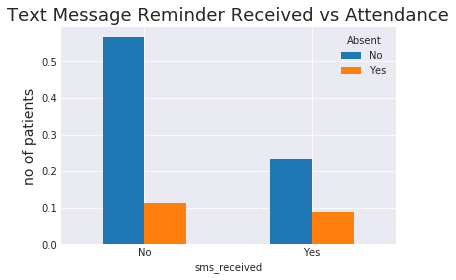

In [49]:
# Plot a bar graph based on groupby data
# Using crosstab (It is a function that helps to view the relationship between two or more features)

pd.crosstab(df['sms_received'],df['absent'], normalize=True).plot.bar()

x=[0,1]
xlabels=['No', 'Yes']

# Set titles and axes
plt.title('Text Message Reminder Received vs Attendance', fontsize = 18)
plt.xticks(x, xlabels, rotation='horizontal')
plt.ylabel('no of patients', fontsize=14)
plt.legend(title='Absent', labels=["No", "Yes"]);

As seen from the chart above, sms_received didn't influence attendance as there is little difference between patients that didn't show up for their appointments without receiving a text message and those that also didn't show up even after getting the message

### Do health challenges (alcoholism, diabetes, hypertension) influence a patient to show up for appointments?

#### Alcoholism Plotting

In [50]:
#Checking the ratio of alcoholism that showed up for appointment or not.
df.groupby(['absent', 'alcoholism']).size()

absent  alcoholism
No      0             85524
        1              2683
Yes     0             21642
        1               677
dtype: int64

From this groupby function output, alcoholism doesn't really influence attendance as those with alcoholic challenges showed (2683) than those who have the same challenge and didn't show up. Also, the amount of those without alcoholic challenges (21642) that didn't show up is quite high and from this output, we can deduce that alcohol doesn't have an influence on the attendance.

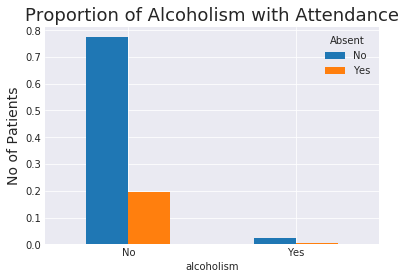

In [51]:
#Plotting graph of the proportion of alcoholism against attendance
pd.crosstab(df['alcoholism'],df['absent'], normalize=True).plot.bar()

#creating x-axis variables
x=[0,1]
xlabels=['No', 'Yes']

# Set titles and axes
plt.title('Proportion of Alcoholism with Attendance', fontsize = 18)
plt.xticks(x, xlabels, rotation='horizontal')
plt.ylabel('No of Patients', fontsize=14)
plt.legend(title='Absent', labels=["No", "Yes"]);

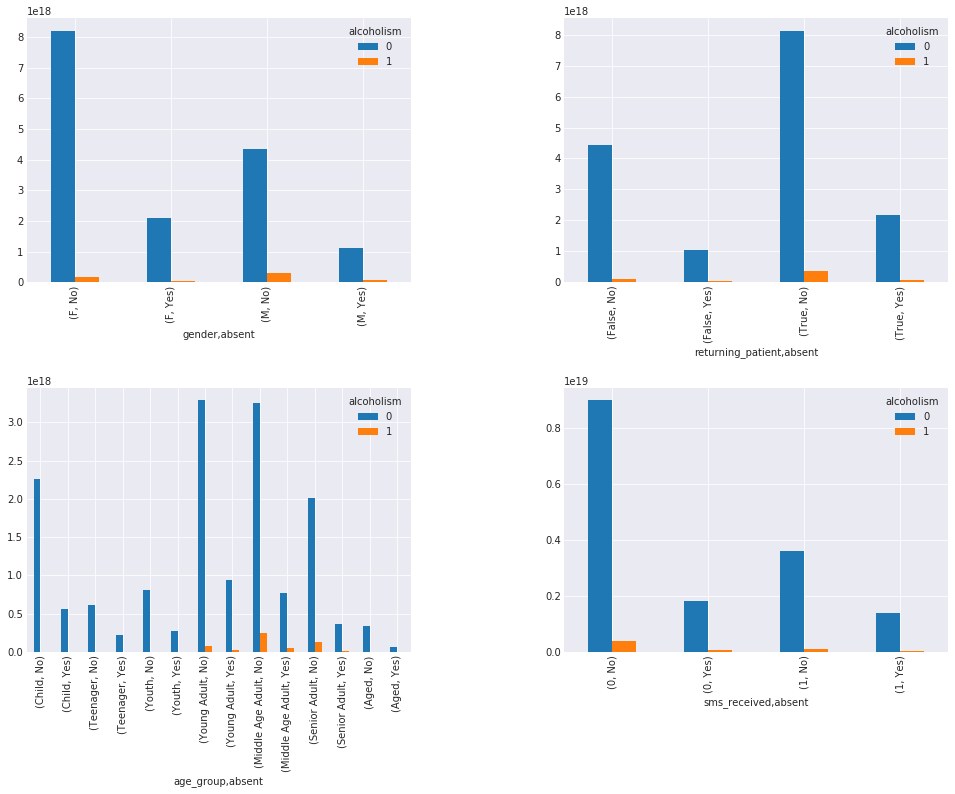

In [52]:
# Plotting independent variables against dependent variable
category_list = ['gender', 'returning_patient', 'age_group', 'sms_received']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(category_list):
    ax = fig.add_subplot(2, 2, i+1)
    df.pivot_table(index=[var, 'absent'], columns=['alcoholism'], values='patient_id', aggfunc='sum', fill_value=0).plot(ax=ax, kind='bar')

#Spacing the plots
plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)
plt.show()

From the plots, alcoholism doesn't influence attendance. There more male patients with the alcoholic challenge than female patients. Just five age groups (from young adult to senior adults) have alcoholism issue. 

#### Hypertension Plotting

In [53]:
#Checking the ratio of hypertension that showed up for appointment or not.
df.groupby(['absent', 'hypertension']).size()

absent  hypertension
No      0               70178
        1               18029
Yes     0               18547
        1                3772
dtype: int64

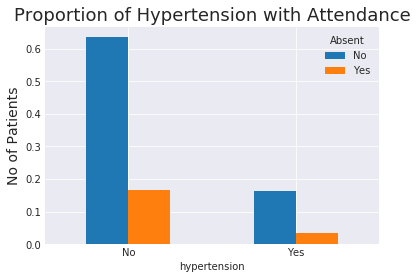

In [54]:
#Plotting graph of the proportion of hypertension against attendance
pd.crosstab(df['hypertension'],df['absent'], normalize=True).plot.bar()

#creating x-axis variables
x=[0,1]
xlabels=['No', 'Yes']

# Set titles and axes
plt.title('Proportion of Hypertension with Attendance', fontsize = 18)
plt.xticks(x, xlabels, rotation='horizontal')
plt.ylabel('No of Patients', fontsize=14)
plt.legend(title='Absent', labels=["No", "Yes"]);

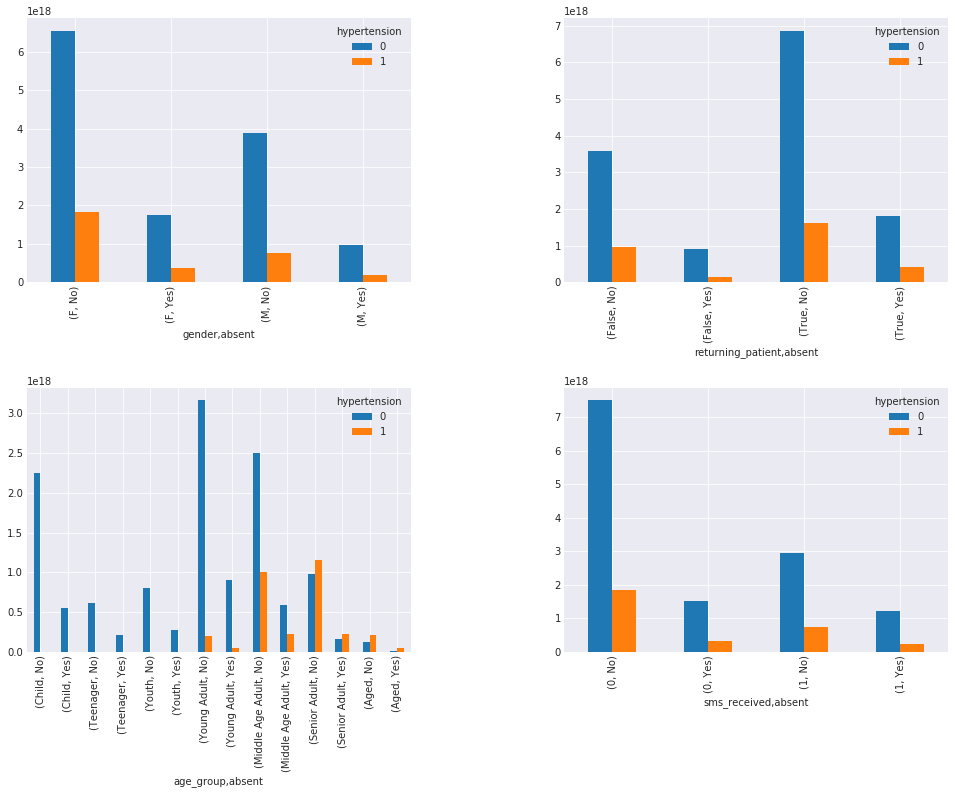

In [55]:
# Plotting 
category_list = ['gender', 'returning_patient', 'age_group', 'sms_received']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(category_list):
    ax = fig.add_subplot(2, 2, i+1)
    df.pivot_table(index=[var, 'absent'], columns=['hypertension'], values='patient_id', aggfunc='sum', fill_value=0).plot(ax=ax, kind='bar')

#Spacing the plots
plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)
plt.show()

As seen from the charts above; 
 *Gender*
 - there are more hypertensive females than males and hypertension is quite significant.
 - 70% of the female patients that are not hypertensive showed up for their appointments
 - About 18% of the female patients that are hypertensive showed up for their appointments
 - Almost 40% of the male patients are not hypertensive and showed up for their appointments
 - About 9% of the male patients are hypertensive and showed up for their appointments
 
 *Returning/New Patients*
 - there are more regular patients that are hypertensive than new patients
 - hypertension doesn't seem to influence attendance
 
 *Age Group*
 - there are four age groups that have hypertension values: Young Adult, Middle Age Adult, Senior Adult, Aged
 - There are more hypertensive patients than non-hypertensive patients in the senior adult and aged age groups and this seems to be an influencing factor regarding attending as seen in the chart.
 
 *SMS Received*
 - From the graph, it can be deduced it doesn't have an influence on attendance.

#### Diabetes Plotting

In [56]:
#Checking the ratio of diabetes that showed up for appointment or not.
df.groupby(['absent', 'diabetes']).size()

absent  diabetes
No      0           81694
        1            6513
Yes     0           20889
        1            1430
dtype: int64

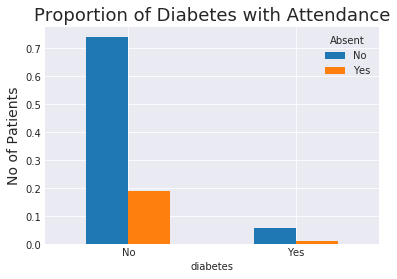

In [57]:
#Plotting graph of the proportion of diabetes against attendance
pd.crosstab(df['diabetes'],df['absent'], normalize=True).plot.bar()

#creating x-axis variables
x=[0,1]
xlabels=['No', 'Yes']

# Set titles and axes
plt.title('Proportion of Diabetes with Attendance', fontsize = 18)
plt.xticks(x, xlabels, rotation='horizontal')
plt.ylabel('No of Patients', fontsize=14)
plt.legend(title='Absent', labels=["No", "Yes"]);

From the plot, it can be deduced most of the patients are not diabetic and also diabetes do not influence attendance.

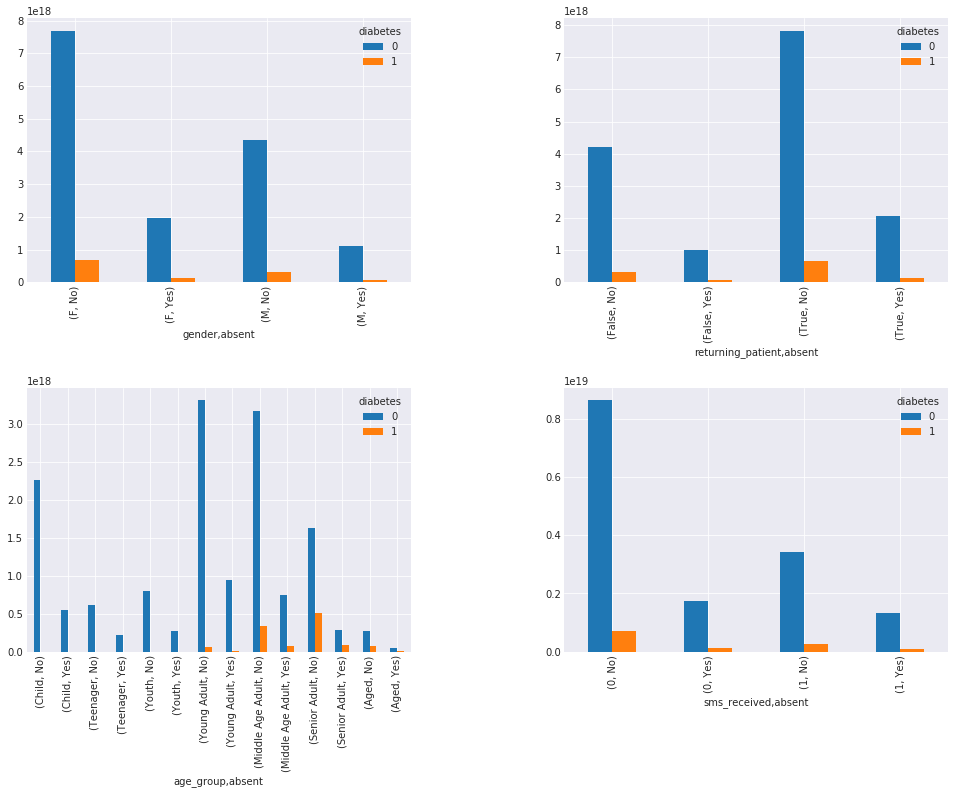

In [58]:
# Plotting 
category_list = ['gender', 'returning_patient', 'age_group', 'sms_received']

fig = plt.figure(figsize=(16, 11))
for i, var in enumerate(category_list):
    ax = fig.add_subplot(2, 2, i+1)
    df.pivot_table(index=[var, 'absent'], columns=['diabetes'], values='patient_id', aggfunc='sum', fill_value=0).plot(ax=ax, kind='bar')

#spacing the plots
plt.subplots_adjust(left=0.1,
                bottom=0.1, 
                right=0.9, 
                top=0.9, 
                wspace=0.4, 
                hspace=0.4)
plt.show()

As seen from the charts above; 
 *Gender*
 - there are more diabetic females than males.
 
 *Returning/New Patients*
 - there are more regular patients that are diabetic than new patients
 
 *Age Group*
 - there are four age groups that have diabetes values: Young Adult, Middle Age Adult, Senior Adult, Aged
 - There are more diabetic patients than non-diabetic patients in the Middle Age Adult and Senior Adult age groups.
 
 *SMS received*
 - Diabetes doesn't have an influence on attendance
    
Across all plots, it can be deduced that diabetes doesn't have an influence on attendance.

<a id='conclusions'></a>
## Conclusions

Having analysed the dataset, here are my findings:

- Regarding the attendance of the patients, only 80% of the patients showed up for their appointments while 20% were absent.


- 66% of the patients are returning patients and 34% are new patients and the returning patients have higher rate of attendance.


- There are more female patients than male patients generally across all age groups and based on attendance, about 52% of females had a higher attendance than males (28%)


- Regarding the scholarship (welfare), patients on scholarship (the Bolsa Familia welfare) are not many at all considering the size total of all the patients. The limitation here though is that we cannot ascertain if people were previously in the welfare and were removed as there are conditions required for families to remain in the program or alternatively, if there are factors that determine the welfare suchas income of patients that do not need the welfare program since the program is to alleviate poverty as seen here <a href="#3">3</a>


- Regarding the relationship between scholarship and attendance, gender, age_grade, and status of patient (new or regular); there are more females on scholarship than males, more regular patients on scholarship than new patients and generally, children, young adult, middle-aged adult age groups are the ones predominantly on scholarship


- The volume of text message sent is low considering the importance of notification. The limitation is that we cannot ascertain if people needed to signup to receive notifications or there is a payment for it. More information would have been needed for this variable.


- Regarding the health challenges, there are more male patients affected by alcoholism than females although generally, alcoholism doesn't influence the attendance. Female patients are more diabetic than male although diabetes is generally really low amongst patients.


- Regarding hypertension health challenge, there are more hypertensive females than males and 18% of the female patients that are hypertensive showed up for their appointments while about 9% of the male patients are hypertensive and showed up for their appointments. There are more regular patients that are hypertensive than new patients. Hypertension seem to be more significant as patients age especially in the Senior Adult and Aged age groups as the chance of having high blood pressure increases as one gets older, especially isolated systolic hypertension.<a href=#4>4</a>

#### References

1. <a href="https://stackoverflow.com/questions/45299305/how-to-plot-pandas-groupby-values-in-a-graph" id="1">Using Groupby values to plot</a>. 

2. <a href="https://www.geeksforgeeks.org/using-pandas-crosstab-to-create-a-bar-plot/" target="_blank" id="2">Crosstab</a>

3. <a href='https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia' target="_blank" id="3">Bolsa Familia</a>

4. <a hef="https://www.nia.nih.gov/health/high-blood-pressure-and-older-adults#:~:text=High%20blood%20pressure%2C%20or%20hypertension,habits%20and%20feel%20just%20fine." id="4">Hypertension Prevalence, Awareness and Blood Pressure Control in Matao, Brazil: A Pilot Study in Partnership With the Brazilian Family Health Strategy Program</a>

In [59]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0